# Proyecto microplasticos

***
Equipo Triada:
* García Saavedra Armando
* Orozco Guillén Jorge David
* Rodriguez Nuñez Diego Eduardo

El proposito de este proyecto es recabar informacion sobre los mircoplasticos y como esta afectando en nuestra salud
***

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import cm
import xlrd

In [24]:
datos = pd.read_csv('data/MarineMicroplastics_-2121837717606009507.csv')
datos

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Short Reference,DOI,Organization,Keywords,Accession Number,Accession Link,GlobalID,Long Reference,x,y
0,56632,5/24/2009 12:00:00 AM,22.990000,-148.78000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,f46437f2-fb88-4466-809e-adf7c27935e5,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.656211e+07,2.630809e+06
1,56964,4/28/2003 12:00:00 AM,19.230000,-155.00000,Pacific Ocean,NaN,NaN,0.116632,pieces/m3,0.005-1,...,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,70b09120-0404-4044-a1c3-506e8c2c54b2,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.725452e+07,2.182033e+06
2,58624,10/18/2012 12:00:00 AM,27.840000,-140.77000,Pacific Ocean,NaN,NaN,1.175804,pieces/m3,1-10,...,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,18b1d080-0f21-4b64-8de1-73db48184c8a,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.567044e+07,3.228816e+06
3,60284,9/18/1987 12:00:00 AM,2.217000,-110.36700,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,Goldstein et al.2013,https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,69454f3e-59ac-4111-931e-37b0f780f472,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",-1.228600e+07,2.468569e+05
4,56300,2/16/2002 12:00:00 AM,-15.910000,-148.58000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,043bd17f-da30-4e4c-8d13-f5171cf2e749,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.653985e+07,-1.794303e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,63381,5/18/2018 12:00:00 AM,21.526733,-87.37755,Atlantic Ocean,Gulf of Mexico,NaN,4231.311707,pieces/m3,500-30000,...,Alvarez-Zeferino et al. 2020,https://doi.org/10.1016/j.resconrec.2019.104633,"Universidad Autónoma de Baja California, Mexico",Mexico,278270,https://www.ncei.noaa.gov/access/metadata/land...,e3715555-b4f6-488a-9ba5-d4f86e1d32f1,"Alvarez-Zeferino, J.C., S. Ojeda-Benítez, A. A...",-9.726824e+06,2.454798e+06
17697,52655,3/4/1995 12:00:00 AM,16.520000,-84.17000,Atlantic Ocean,Caribbean Sea,NaN,0.000000,pieces/m3,0-0.0005,...,Law et al.2010,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,e35e8203-34e3-4f5b-a292-0e98c8b6fe68,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-9.369762e+06,1.865021e+06
17698,60956,9/27/2009 12:00:00 AM,36.074000,-140.82970,Pacific Ocean,NaN,NaN,2.689615,pieces/m3,1-10,...,Eriksen et al.2014,https://doi.org/10.1371/journal.pone.0111913,5 Gyres Institute,SV Mir; ORV Alguita; SV Sea Dragon; RV Stad Am...,275968,https://www.ncei.noaa.gov/access/metadata/land...,48a50788-8b96-44ed-ad36-aa6de1a1703e,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.567709e+07,4.310808e+06
17699,54464,6/26/2004 12:00:00 AM,39.350000,-71.19000,Atlantic Ocean,NaN,NaN,0.002160,pieces/m3,0.0005-0.005,...,Law et al.2010,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,9b8bf2d1-3adf-4ff7-8730-ca54c1f515d2,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-7.924835e+06,4.771931e+06


In [25]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17701 entries, 0 to 17700
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FID               17701 non-null  int64  
 1   Date              17701 non-null  object 
 2   Latitude          17701 non-null  float64
 3   Longitude         17701 non-null  float64
 4   Oceans            17430 non-null  object 
 5   Regions           6849 non-null   object 
 6   SubRegions        19 non-null     object 
 7   Measurement       11900 non-null  float64
 8   Unit              17701 non-null  object 
 9   Density Range     17701 non-null  object 
 10  Density Class     17701 non-null  object 
 11  Sampling Method   17701 non-null  object 
 12  Short Reference   17701 non-null  object 
 13  DOI               17701 non-null  object 
 14  Organization      17701 non-null  object 
 15  Keywords          17701 non-null  object 
 16  Accession Number  17701 non-null  int64 

In [26]:
datos.describe()

,FID,Latitude,Longitude,Measurement,Accession Number,x,y
count,17701.000000,17701.000000,17701.000000,11900.000000,17701.000000,1.770100e+04,1.770100e+04
mean,59591.145811,27.261422,-92.324677,174.131243,234379.524095,-1.027754e+07,3.218682e+06
std,6674.696939,10.459477,33.480560,2398.020798,26601.859314,3.727039e+06,1.346254e+06
min,49260.000000,-19.320200,-179.994200,0.000000,170967.000000,-2.003686e+07,-2.192671e+06
25%,53685.000000,20.974583,-101.748865,0.000000,211007.000000,-1.132663e+07,2.388848e+06
50%,58187.000000,28.000300,-87.803100,0.004320,211009.000000,-9.774196e+06,3.249012e+06
75%,66233.000000,32.647400,-69.400000,0.041396,259486.000000,-7.725573e+06,3.848595e+06
max,70674.000000,64.207333,-10.106613,110480.000000,278270.000000,-1.125063e+06,9.402610e+06


***
# Filtro 1

In [27]:
subdatos = datos.loc[(datos['Oceans'] == "Pacific Ocean") | (datos['Oceans'] == "Atlantic Ocean")]
subdatos

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Short Reference,DOI,Organization,Keywords,Accession Number,Accession Link,GlobalID,Long Reference,x,y
0,56632,5/24/2009 12:00:00 AM,22.990000,-148.78000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,f46437f2-fb88-4466-809e-adf7c27935e5,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.656211e+07,2.630809e+06
1,56964,4/28/2003 12:00:00 AM,19.230000,-155.00000,Pacific Ocean,NaN,NaN,0.116632,pieces/m3,0.005-1,...,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,70b09120-0404-4044-a1c3-506e8c2c54b2,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.725452e+07,2.182033e+06
2,58624,10/18/2012 12:00:00 AM,27.840000,-140.77000,Pacific Ocean,NaN,NaN,1.175804,pieces/m3,1-10,...,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,18b1d080-0f21-4b64-8de1-73db48184c8a,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.567044e+07,3.228816e+06
3,60284,9/18/1987 12:00:00 AM,2.217000,-110.36700,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,Goldstein et al.2013,https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,69454f3e-59ac-4111-931e-37b0f780f472,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",-1.228600e+07,2.468569e+05
4,56300,2/16/2002 12:00:00 AM,-15.910000,-148.58000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,043bd17f-da30-4e4c-8d13-f5171cf2e749,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.653985e+07,-1.794303e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,63381,5/18/2018 12:00:00 AM,21.526733,-87.37755,Atlantic Ocean,Gulf of Mexico,NaN,4231.311707,pieces/m3,500-30000,...,Alvarez-Zeferino et al. 2020,https://doi.org/10.1016/j.resconrec.2019.104633,"Universidad Autónoma de Baja California, Mexico",Mexico,278270,https://www.ncei.noaa.gov/access/metadata/land...,e3715555-b4f6-488a-9ba5-d4f86e1d32f1,"Alvarez-Zeferino, J.C., S. Ojeda-Benítez, A. A...",-9.726824e+06,2.454798e+06
17697,52655,3/4/1995 12:00:00 AM,16.520000,-84.17000,Atlantic Ocean,Caribbean Sea,NaN,0.000000,pieces/m3,0-0.0005,...,Law et al.2010,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,e35e8203-34e3-4f5b-a292-0e98c8b6fe68,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-9.369762e+06,1.865021e+06
17698,60956,9/27/2009 12:00:00 AM,36.074000,-140.82970,Pacific Ocean,NaN,NaN,2.689615,pieces/m3,1-10,...,Eriksen et al.2014,https://doi.org/10.1371/journal.pone.0111913,5 Gyres Institute,SV Mir; ORV Alguita; SV Sea Dragon; RV Stad Am...,275968,https://www.ncei.noaa.gov/access/metadata/land...,48a50788-8b96-44ed-ad36-aa6de1a1703e,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.567709e+07,4.310808e+06
17699,54464,6/26/2004 12:00:00 AM,39.350000,-71.19000,Atlantic Ocean,NaN,NaN,0.002160,pieces/m3,0.0005-0.005,...,Law et al.2010,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,9b8bf2d1-3adf-4ff7-8730-ca54c1f515d2,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-7.924835e+06,4.771931e+06


In [28]:
subdatos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17423 entries, 0 to 17700
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FID               17423 non-null  int64  
 1   Date              17423 non-null  object 
 2   Latitude          17423 non-null  float64
 3   Longitude         17423 non-null  float64
 4   Oceans            17423 non-null  object 
 5   Regions           6842 non-null   object 
 6   SubRegions        19 non-null     object 
 7   Measurement       11893 non-null  float64
 8   Unit              17423 non-null  object 
 9   Density Range     17423 non-null  object 
 10  Density Class     17423 non-null  object 
 11  Sampling Method   17423 non-null  object 
 12  Short Reference   17423 non-null  object 
 13  DOI               17423 non-null  object 
 14  Organization      17423 non-null  object 
 15  Keywords          17423 non-null  object 
 16  Accession Number  17423 non-null  int64  
 17

In [29]:
sdtndp = subdatos.drop_duplicates()
sdtndp

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Short Reference,DOI,Organization,Keywords,Accession Number,Accession Link,GlobalID,Long Reference,x,y
0,56632,5/24/2009 12:00:00 AM,22.990000,-148.78000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,f46437f2-fb88-4466-809e-adf7c27935e5,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.656211e+07,2.630809e+06
1,56964,4/28/2003 12:00:00 AM,19.230000,-155.00000,Pacific Ocean,NaN,NaN,0.116632,pieces/m3,0.005-1,...,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,70b09120-0404-4044-a1c3-506e8c2c54b2,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.725452e+07,2.182033e+06
2,58624,10/18/2012 12:00:00 AM,27.840000,-140.77000,Pacific Ocean,NaN,NaN,1.175804,pieces/m3,1-10,...,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,18b1d080-0f21-4b64-8de1-73db48184c8a,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.567044e+07,3.228816e+06
3,60284,9/18/1987 12:00:00 AM,2.217000,-110.36700,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,Goldstein et al.2013,https://doi.org/10.1371/journal.pone.0080020,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448,https://www.ncei.noaa.gov/access/metadata/land...,69454f3e-59ac-4111-931e-37b0f780f472,"Goldstein, M.C., A.J. Titmus, M. Ford. 2013. S...",-1.228600e+07,2.468569e+05
4,56300,2/16/2002 12:00:00 AM,-15.910000,-148.58000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,Law et al.2014,https://doi.org/10.1021/es4053076,Sea Education Association,SEA,211008,https://www.ncei.noaa.gov/access/metadata/land...,043bd17f-da30-4e4c-8d13-f5171cf2e749,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.653985e+07,-1.794303e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,63381,5/18/2018 12:00:00 AM,21.526733,-87.37755,Atlantic Ocean,Gulf of Mexico,NaN,4231.311707,pieces/m3,500-30000,...,Alvarez-Zeferino et al. 2020,https://doi.org/10.1016/j.resconrec.2019.104633,"Universidad Autónoma de Baja California, Mexico",Mexico,278270,https://www.ncei.noaa.gov/access/metadata/land...,e3715555-b4f6-488a-9ba5-d4f86e1d32f1,"Alvarez-Zeferino, J.C., S. Ojeda-Benítez, A. A...",-9.726824e+06,2.454798e+06
17697,52655,3/4/1995 12:00:00 AM,16.520000,-84.17000,Atlantic Ocean,Caribbean Sea,NaN,0.000000,pieces/m3,0-0.0005,...,Law et al.2010,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,e35e8203-34e3-4f5b-a292-0e98c8b6fe68,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-9.369762e+06,1.865021e+06
17698,60956,9/27/2009 12:00:00 AM,36.074000,-140.82970,Pacific Ocean,NaN,NaN,2.689615,pieces/m3,1-10,...,Eriksen et al.2014,https://doi.org/10.1371/journal.pone.0111913,5 Gyres Institute,SV Mir; ORV Alguita; SV Sea Dragon; RV Stad Am...,275968,https://www.ncei.noaa.gov/access/metadata/land...,48a50788-8b96-44ed-ad36-aa6de1a1703e,"Eriksen, M., L.C.M. Lebreton, H.S. Carson, M. ...",-1.567709e+07,4.310808e+06
17699,54464,6/26/2004 12:00:00 AM,39.350000,-71.19000,Atlantic Ocean,NaN,NaN,0.002160,pieces/m3,0.0005-0.005,...,Law et al.2010,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,9b8bf2d1-3adf-4ff7-8730-ca54c1f515d2,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-7.924835e+06,4.771931e+06


In [30]:
nuestros = subdatos.loc[(subdatos['Regions'] == "Caribbean Sea") | (subdatos['Regions'] == "Gulf of Mexico")]
nuestros

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Short Reference,DOI,Organization,Keywords,Accession Number,Accession Link,GlobalID,Long Reference,x,y
7,69035,9/22/2020 12:00:00 AM,30.305600,-89.32840,Atlantic Ocean,Gulf of Mexico,NaN,NaN,pieces/10 mins,1-2,...,Tunnell et al. 2020,https://doi.org/10.1016/j.marpolbul.2019.110794,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,10a70196-9a88-4529-80b2-0e5e75b73e23,"Tunnell, Jace W.; Dunning, Kelly H.; Scheef, L...",-9.943992e+06,3.542893e+06
8,65786,10/19/2019 12:00:00 AM,30.306300,-89.32770,Atlantic Ocean,Gulf of Mexico,NaN,NaN,pieces/10 mins,40-200,...,Tunnell et al. 2020,https://doi.org/10.1016/j.marpolbul.2019.110794,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,d707f02e-287e-4d9e-99f1-9d548fd07cb4,"Tunnell, Jace W.; Dunning, Kelly H.; Scheef, L...",-9.943914e+06,3.542983e+06
9,68039,9/25/2021 12:00:00 AM,29.652100,-95.00960,Atlantic Ocean,Gulf of Mexico,NaN,NaN,pieces/10 mins,40-200,...,Tunnell et al. 2020,https://doi.org/10.1016/j.marpolbul.2019.110794,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,1c1dae14-afd0-4ad9-a13c-56b112b3b659,"Tunnell, Jace W.; Dunning, Kelly H.; Scheef, L...",-1.057642e+07,3.458908e+06
10,67707,6/15/2021 12:00:00 AM,29.761400,-95.07980,Atlantic Ocean,Gulf of Mexico,NaN,NaN,pieces/10 mins,40-200,...,Tunnell et al. 2020,https://doi.org/10.1016/j.marpolbul.2019.110794,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,f6c01ee7-73f6-4e97-8f05-3290646eb375,"Tunnell, Jace W.; Dunning, Kelly H.; Scheef, L...",-1.058423e+07,3.472917e+06
15,67114,7/26/2019 12:00:00 AM,30.239600,-87.89540,Atlantic Ocean,Gulf of Mexico,NaN,NaN,pieces/10 mins,2-40,...,Tunnell et al. 2020,https://doi.org/10.1016/j.marpolbul.2019.110794,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,2a6a5f62-c7ef-43bc-af65-a99693b04f69,"Tunnell, Jace W.; Dunning, Kelly H.; Scheef, L...",-9.784471e+06,3.534386e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17686,50294,11/14/1995 12:00:00 AM,11.780000,-60.42000,Atlantic Ocean,Caribbean Sea,NaN,0.000000,pieces/m3,0-0.0005,...,Law et al.2010,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,bb7dd6ae-a6c1-40ae-adb9-60521e8cedd8,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-6.725924e+06,1.320681e+06
17692,49999,12/6/2000 12:00:00 AM,12.170000,-64.56000,Atlantic Ocean,Caribbean Sea,NaN,0.000000,pieces/m3,0-0.0005,...,Law et al.2010,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,49931266-76c5-4f84-ac19-3919e756c8eb,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-7.186786e+06,1.365062e+06
17694,70168,5/7/2022 12:00:00 AM,29.652800,-95.00900,Atlantic Ocean,Gulf of Mexico,NaN,NaN,pieces/10 mins,40-200,...,Tunnell et al. 2020,https://doi.org/10.1016/j.marpolbul.2019.110794,University of Texas Marine Science Institute,Nurdle Patrol,259486,https://www.ncei.noaa.gov/access/metadata/land...,a58615a8-cbfe-498a-9d2a-bf909530ca4d,"Tunnell, Jace W.; Dunning, Kelly H.; Scheef, L...",-1.057635e+07,3.458998e+06
17696,63381,5/18/2018 12:00:00 AM,21.526733,-87.37755,Atlantic Ocean,Gulf of Mexico,NaN,4231.311707,pieces/m3,500-30000,...,Alvarez-Zeferino et al. 2020,https://doi.org/10.1016/j.resconrec.2019.104633,"Universidad Autónoma de Baja California, Mexico",Mexico,278270,https://www.ncei.noaa.gov/access/metadata/land...,e3715555-b4f6-488a-9ba5-d4f86e1d32f1,"Alvarez-Zeferino, J.C., S. Ojeda-Benítez, A. A...",-9.726824e+06,2.454798e+06


In [31]:
nuestros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6429 entries, 7 to 17697
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FID               6429 non-null   int64  
 1   Date              6429 non-null   object 
 2   Latitude          6429 non-null   float64
 3   Longitude         6429 non-null   float64
 4   Oceans            6429 non-null   object 
 5   Regions           6429 non-null   object 
 6   SubRegions        13 non-null     object 
 7   Measurement       2017 non-null   float64
 8   Unit              6429 non-null   object 
 9   Density Range     6429 non-null   object 
 10  Density Class     6429 non-null   object 
 11  Sampling Method   6429 non-null   object 
 12  Short Reference   6429 non-null   object 
 13  DOI               6429 non-null   object 
 14  Organization      6429 non-null   object 
 15  Keywords          6429 non-null   object 
 16  Accession Number  6429 non-null   int64  
 17 

In [32]:
datos_min = nuestros[['Latitude', 'Longitude', 'Density Class', 'x', 'y']]
datos_min['Density Class'].unique()

array(['Low', 'High', 'Medium', 'Very Low', 'Very High'], dtype=object)

In [33]:
datos_min['Density Class'] = datos_min['Density Class'].replace('Very Low', 0)
datos_min['Density Class'] = datos_min['Density Class'].replace('Low', 1)
datos_min['Density Class'] = datos_min['Density Class'].replace('Medium', 2)
datos_min['Density Class'] = datos_min['Density Class'].replace('High', 3)
datos_min['Density Class'] = datos_min['Density Class'].replace('Very High', 4)
datos_min['Density Class'].unique()

C:\Users\dern9\AppData\Local\Temp\ipykernel_20052\4039897714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_min['Density Class'] = datos_min['Density Class'].replace('Very Low', 0)
C:\Users\dern9\AppData\Local\Temp\ipykernel_20052\4039897714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_min['Density Class'] = datos_min['Density Class'].replace('Low', 1)
C:\Users\dern9\AppData\Local\Temp\ipykernel_20052\4039897714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

array([1, 3, 2, 0, 4], dtype=int64)

In [34]:
datos_min.to_csv('data/MarineMicroplastics_min.csv', index=False)

In [35]:
datos_min

,Latitude,Longitude,Density Class,x,y
7,30.305600,-89.32840,1,-9.943992e+06,3.542893e+06
8,30.306300,-89.32770,3,-9.943914e+06,3.542983e+06
9,29.652100,-95.00960,3,-1.057642e+07,3.458908e+06
10,29.761400,-95.07980,3,-1.058423e+07,3.472917e+06
15,30.239600,-87.89540,2,-9.784471e+06,3.534386e+06
...,...,...,...,...,...
17686,11.780000,-60.42000,0,-6.725924e+06,1.320681e+06
17692,12.170000,-64.56000,0,-7.186786e+06,1.365062e+06
17694,29.652800,-95.00900,3,-1.057635e+07,3.458998e+06
17696,21.526733,-87.37755,2,-9.726824e+06,2.454798e+06


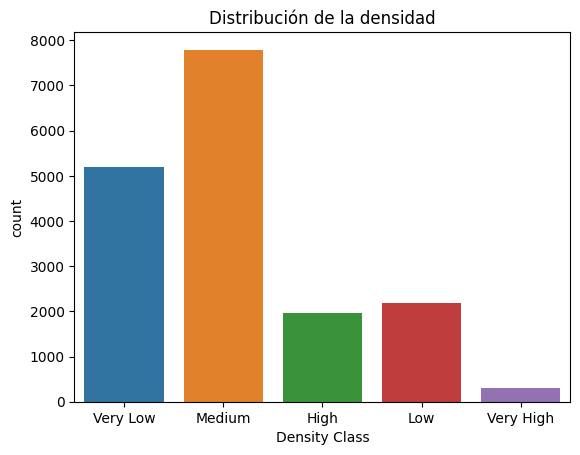

In [36]:
plt.title("Distribución de la densidad")
sns.countplot(data=subdatos,x='Density Class')
plt.show()

In [37]:
subdatos.value_counts('Density Class').reset_index(name='Cantidad')

,Density Class,Cantidad
0,Medium,7790
1,Very Low,5185
2,Low,2185
3,High,1960
4,Very High,303


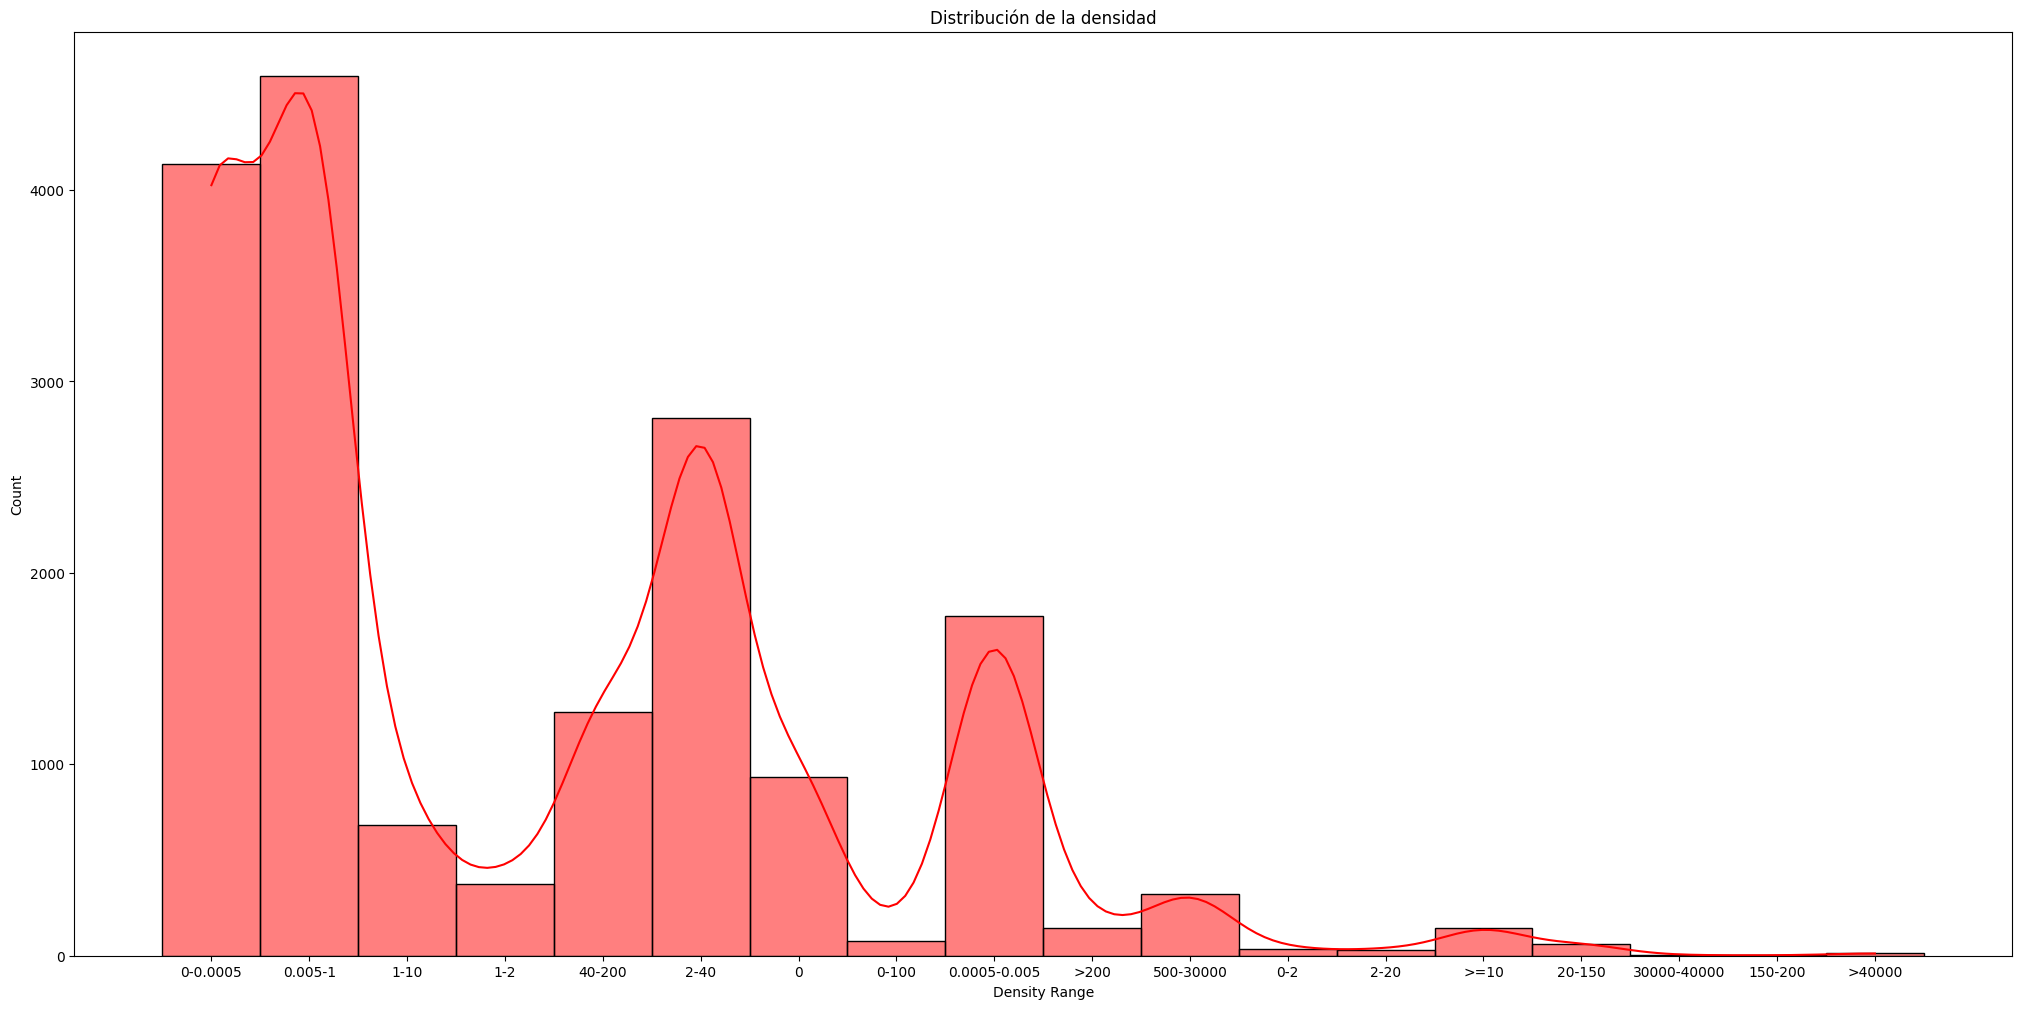

In [38]:
plt.figure(figsize=(25,12))
sns.histplot(data=subdatos,x='Density Range', color='red',kde=True)
plt.title("Distribución de la densidad")
plt.show()

<Axes: >

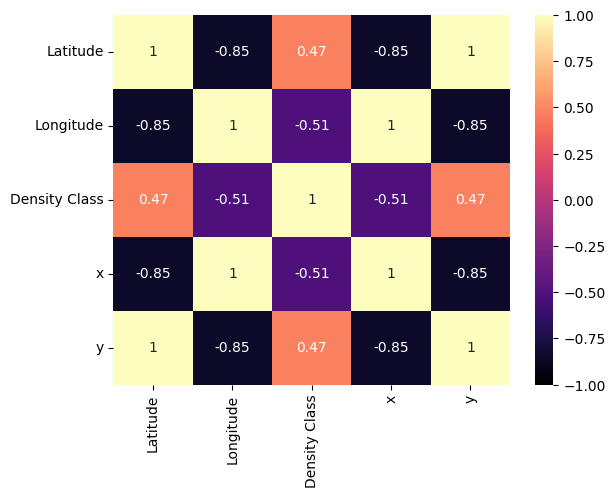

In [39]:
sns.heatmap(datos_min.corr(),vmin=-1,vmax=1, cmap='magma',annot=True)

***
Mapa

In [40]:
lat = np.array(subdatos['Latitude'])
lon = np.array(subdatos['Longitude'])

In [41]:
nx,ny=21,12
lon_bins = np.linspace(-120,-80,nx+1)
lat_bins = np.linspace(10,35,ny+1)

In [42]:
density, _, _ =np.histogram2d(lon,lat,[lon_bins,lat_bins])

In [43]:
map = Basemap(projection = 'merc', llcrnrlon=-120,llcrnrlat=10,urcrnrlon=-80,urcrnrlat=35,resolution='f')

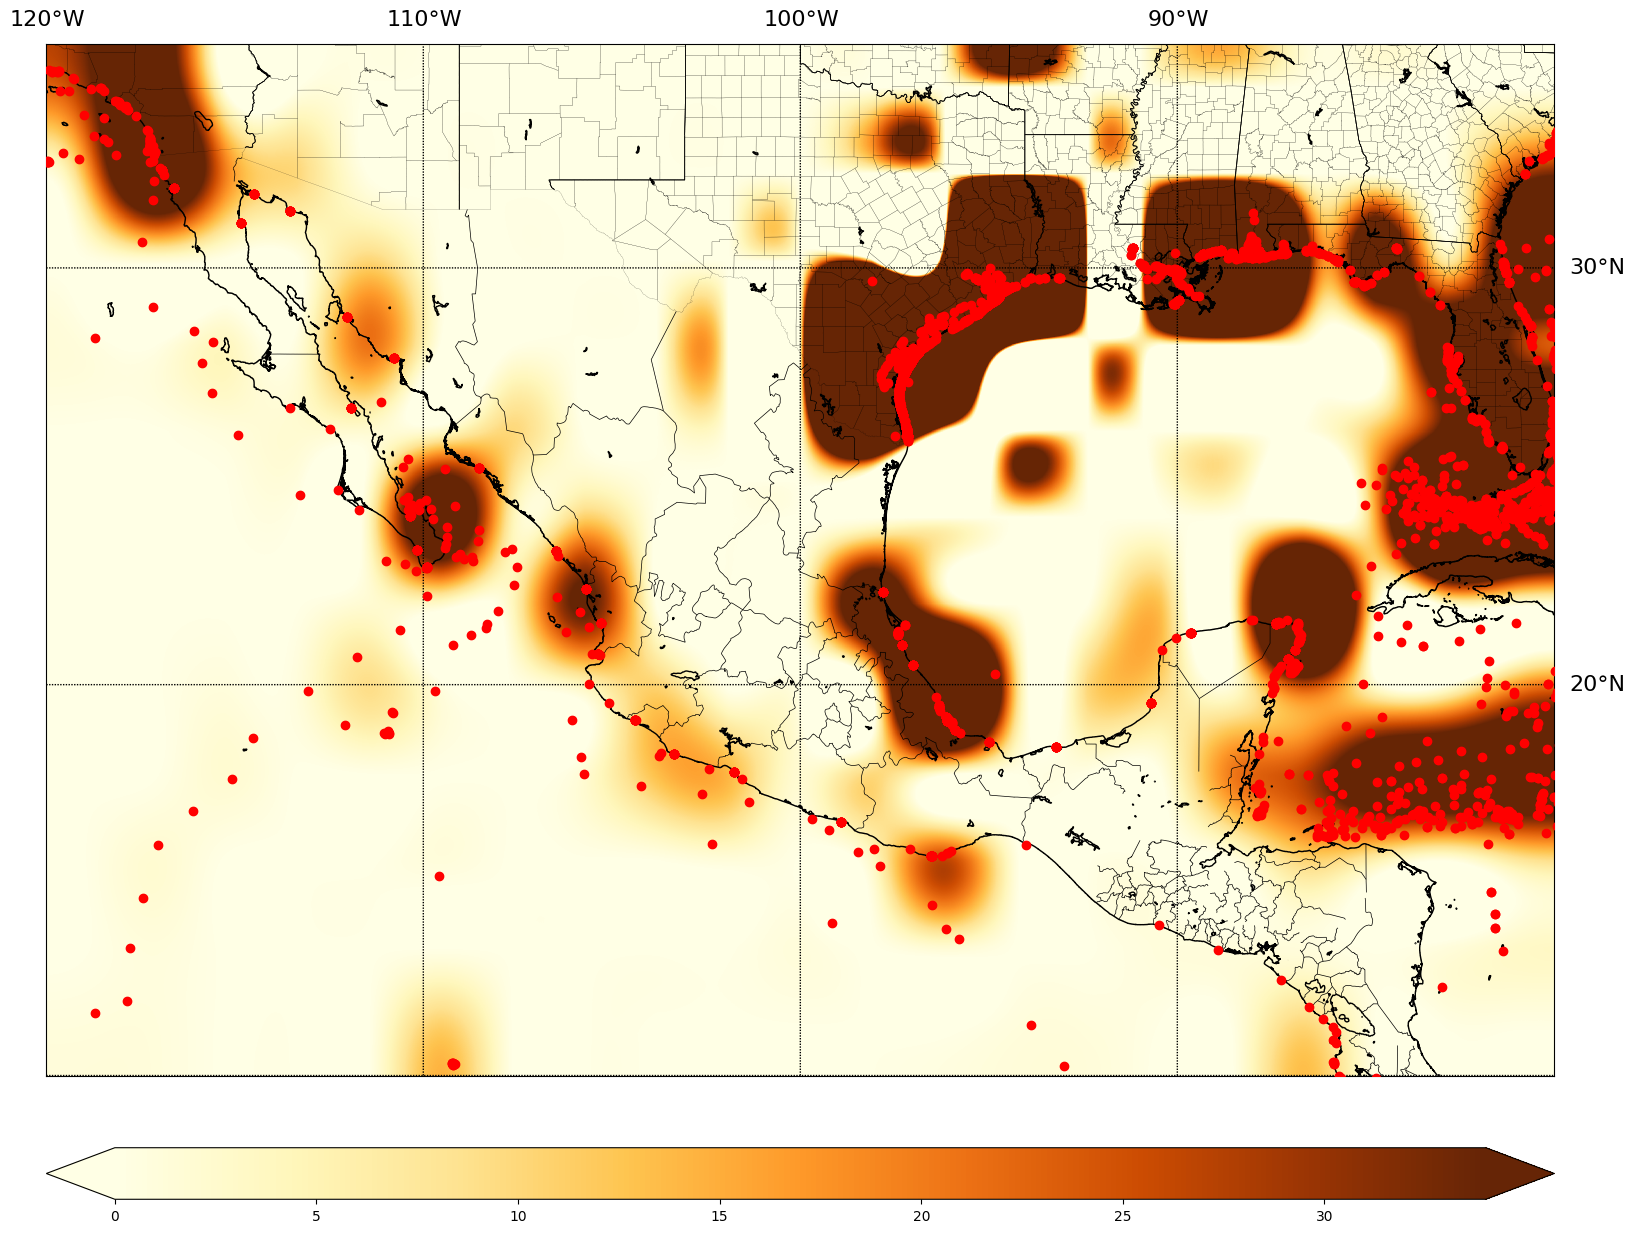

In [44]:
fig = plt.figure(figsize=(20, 15))
map.drawcoastlines(linewidth=1)
map.drawstates()
map.drawcounties()
parallels =np.arange(10,35,10)
map.drawparallels(parallels,labels=[False,True,True,False],fontsize=16)
meridians = np.arange(-120,-80,10)
map.drawmeridians(meridians,labels=[False,True,True,False],fontsize=16)
x, y = map(lon, lat)
map.scatter(x, y, marker='o', color='red', zorder=10)

a = map.imshow(density.T, interpolation='spline36',alpha=1,cmap='YlOrBr',vmin=0,vmax=34)

cbar = map.colorbar(a,'bottom',pad='7%',extend='both')

for lons,lats in zip(lon,lat):
    x,y=map.projtran(lons,lats)
    map.plot(x,y,'ro',markersize=5)